In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
all_BE = {}
for file in os.listdir('./outputs/BF/'):
    be = []
    with open('./outputs/BF/'+file, 'rb') as f:
        data = np.loadtxt(f, delimiter=',')
        # be = np.exp(data[:,0] - data[:,0][0])
        be = data[:,0] - data[:,0][0]
        # print(be)
    f.close()
    all_BE[file.replace('_results.txt', '')] = be
    # with open('./outputs/BE/'+file, 'wb') as f:
    #     np.savetxt(f, be, delimiter=',')
        
    f.close()

In [3]:
all_BE_df = pd.DataFrame(all_BE).T

In [5]:
all_BE_df

,0,1,2
GRB081221,0.0,-1.250123,-0.580644
GRB120119A,0.0,-0.837172,-0.167343
GRB210204A,0.0,-1.622117,-0.215865
GRB200613A,0.0,-1.377134,-0.316842
GRB171010A,0.0,-1.081913,-0.134990
GRB130925A,0.0,0.915521,4.732553
GRB180720B,0.0,-1.658881,-0.741871
GRB131231A,0.0,0.184790,-1.109097
GRB131108A,0.0,-1.531295,-0.850298
GRB150514A,0.0,-1.032548,-0.373851


In [6]:
all_BE_df.sort_index(inplace=True, ascending=False)

In [7]:
all_BE_df

,0,1,2
GRB210619B,0.0,-4.139304,-1.717501
GRB210610B,0.0,-0.980278,-0.430640
GRB210204A,0.0,-1.622117,-0.215865
GRB201216C,0.0,-1.536487,-0.426086
GRB200829A,0.0,-0.412412,-2.695988
GRB200613A,0.0,-1.377134,-0.316842
GRB190114C,0.0,8.783259,3.595947
GRB180720B,0.0,-1.658881,-0.741871
GRB180703A,0.0,8.587815,-0.578302
GRB171010A,0.0,-1.081913,-0.134990


In [8]:
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0).T

In [9]:
grbparam.sort_index(inplace=True, ascending=False)

In [10]:
grbparam

GRB,E0,Emax,redshift
GRB210619B,10.0,11000.0,1.9370
GRB210610B,30.0,380.0,1.1300
GRB210204A,10.0,400.0,0.8760
GRB201216C,15.0,700.0,1.1000
GRB200829A,25.0,3500.0,1.2500
GRB200613A,30.0,300.0,1.2200
GRB190114C,10.0,5000.0,0.4250
GRB180720B,25.0,17000.0,0.6540
GRB180703A,20.0,400.0,0.6678
GRB171010A,10.0,620.0,0.3285


In [11]:
new_df = pd.concat([grbparam, all_BE_df], axis=1)

In [12]:
new_df.drop(['Emax'], axis=1, inplace=True)

In [13]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-4.139304,-1.717501
GRB210610B,30.0,1.1300,0.0,-0.980278,-0.430640
GRB210204A,10.0,0.8760,0.0,-1.622117,-0.215865
GRB201216C,15.0,1.1000,0.0,-1.536487,-0.426086
GRB200829A,25.0,1.2500,0.0,-0.412412,-2.695988
GRB200613A,30.0,1.2200,0.0,-1.377134,-0.316842
GRB190114C,10.0,0.4250,0.0,8.783259,3.595947
GRB180720B,25.0,0.6540,0.0,-1.658881,-0.741871
GRB180703A,20.0,0.6678,0.0,8.587815,-0.578302
GRB171010A,10.0,0.3285,0.0,-1.081913,-0.134990


In [14]:
new_df.sort_index(inplace=True, ascending=False)

In [15]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-4.139304,-1.717501
GRB210610B,30.0,1.1300,0.0,-0.980278,-0.430640
GRB210204A,10.0,0.8760,0.0,-1.622117,-0.215865
GRB201216C,15.0,1.1000,0.0,-1.536487,-0.426086
GRB200829A,25.0,1.2500,0.0,-0.412412,-2.695988
GRB200613A,30.0,1.2200,0.0,-1.377134,-0.316842
GRB190114C,10.0,0.4250,0.0,8.783259,3.595947
GRB180720B,25.0,0.6540,0.0,-1.658881,-0.741871
GRB180703A,20.0,0.6678,0.0,8.587815,-0.578302
GRB171010A,10.0,0.3285,0.0,-1.081913,-0.134990


In [16]:
data = []
for i in os.listdir('./outputs/GOF/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('_GOF.txt'):
        data.append([i.replace('_GOF.txt', ''), *np.loadtxt('./outputs/GOF/' + i)])
df2 = pd.DataFrame(data, columns=['GRB', 'Null', 'Linear', 'Quadratic'])
df2.index = df2['GRB']
df2.drop('GRB', axis=1, inplace=True)
df2.sort_index(inplace=True, ascending=False)

In [17]:
final = pd.concat([new_df, df2], axis=1)

In [18]:
final

,E0,redshift,0,1,2,Null,Linear,Quadratic
GRB210619B,10.0,1.9370,0.0,-4.139304,-1.717501,4.178083,4.137385,3.410066
GRB210610B,30.0,1.1300,0.0,-0.980278,-0.430640,1.176261,1.062441,1.423131
GRB210204A,10.0,0.8760,0.0,-1.622117,-0.215865,8.515583,9.245046,9.166168
GRB201216C,15.0,1.1000,0.0,-1.536487,-0.426086,1.080484,1.093863,1.154474
GRB200829A,25.0,1.2500,0.0,-0.412412,-2.695988,5.890911,7.053718,7.187615
GRB200613A,30.0,1.2200,0.0,-1.377134,-0.316842,1.149994,0.858809,0.932167
GRB190114C,10.0,0.4250,0.0,8.783259,3.595947,5.270427,4.155122,4.535658
GRB180720B,25.0,0.6540,0.0,-1.658881,-0.741871,1.446132,1.307780,1.452393
GRB180703A,20.0,0.6678,0.0,8.587815,-0.578302,10.409009,9.346107,11.387317
GRB171010A,10.0,0.3285,0.0,-1.081913,-0.134990,0.799597,0.935321,0.866096


In [19]:
final = final[['E0', 'redshift', 0, 'Null', 1, 'Linear', 2, 'Quadratic']]

In [20]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,4.178083,-4.139304,4.137385,-1.717501,3.410066
GRB210610B,30.0,1.1300,0.0,1.176261,-0.980278,1.062441,-0.430640,1.423131
GRB210204A,10.0,0.8760,0.0,8.515583,-1.622117,9.245046,-0.215865,9.166168
GRB201216C,15.0,1.1000,0.0,1.080484,-1.536487,1.093863,-0.426086,1.154474
GRB200829A,25.0,1.2500,0.0,5.890911,-0.412412,7.053718,-2.695988,7.187615
GRB200613A,30.0,1.2200,0.0,1.149994,-1.377134,0.858809,-0.316842,0.932167
GRB190114C,10.0,0.4250,0.0,5.270427,8.783259,4.155122,3.595947,4.535658
GRB180720B,25.0,0.6540,0.0,1.446132,-1.658881,1.307780,-0.741871,1.452393
GRB180703A,20.0,0.6678,0.0,10.409009,8.587815,9.346107,-0.578302,11.387317
GRB171010A,10.0,0.3285,0.0,0.799597,-1.081913,0.935321,-0.134990,0.866096


In [21]:
final['Null'] = final['Null'].round(1)
final['Linear'] = final['Linear'].round(1)
final['Quadratic'] = final['Quadratic'].round(1)
final[1] = final[1].round(1)
final[2] = final[2].round(1)

In [22]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,4.2,-4.1,4.1,-1.7,3.4
GRB210610B,30.0,1.1300,0.0,1.2,-1.0,1.1,-0.4,1.4
GRB210204A,10.0,0.8760,0.0,8.5,-1.6,9.2,-0.2,9.2
GRB201216C,15.0,1.1000,0.0,1.1,-1.5,1.1,-0.4,1.2
GRB200829A,25.0,1.2500,0.0,5.9,-0.4,7.1,-2.7,7.2
GRB200613A,30.0,1.2200,0.0,1.1,-1.4,0.9,-0.3,0.9
GRB190114C,10.0,0.4250,0.0,5.3,8.8,4.2,3.6,4.5
GRB180720B,25.0,0.6540,0.0,1.4,-1.7,1.3,-0.7,1.5
GRB180703A,20.0,0.6678,0.0,10.4,8.6,9.3,-0.6,11.4
GRB171010A,10.0,0.3285,0.0,0.8,-1.1,0.9,-0.1,0.9


In [41]:
final.to_latex("./outputs/table.tex", float_format="%.2f")#, columns=['GRB', 'E0 (keV)', 'Redshift', 'Null $\ln(BF)$', 'Null_$\chi^2_{\\nu}$', 'Null + Lin LIV $\ln(BF)$', 'Null+ Lin LIV\_$\chi^2_{\\nu}$', 'Null +Quad LIV $\ln(BF)$', 'Null+Quad LIV\_$\chi^2_{\\nu}$'])

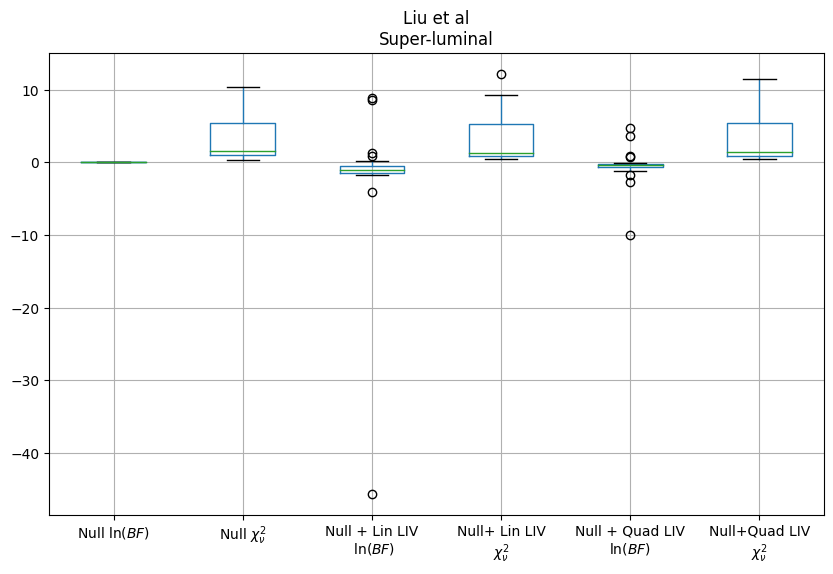

In [57]:
plt.figure(figsize=(10, 6))
temp= final.drop(['E0', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Liu et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()